In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datasets
order_details = pd.read_csv("./Resources/order_details.csv")
orders = pd.read_csv("./Resources/orders.csv")
pizza_types = pd.read_csv("./Resources/pizza_types.csv", encoding='latin-1')
pizzas = pd.read_csv("./Resources/pizzas.csv")

In [3]:
# Define a function to display dataset information
def display_dataset_info(dataset_name, dataset):
    print(f"{dataset_name} Info:")
    dataset.info()
    print("\nNull Values:")
    print(dataset.isnull().sum())

In [4]:
# Display dataset information
datasets = {
    "Order Details": order_details,
    "Orders": orders,
    "Pizza Types": pizza_types,
    "Pizzas": pizzas
}

for dataset_name, dataset in datasets.items():
    display_dataset_info(dataset_name, dataset)
    print()

Order Details Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

Null Values:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB

Null Values:
order_id    0
date        0
time        0
dtype: int6

# Data Merging

In [5]:
# Merge the pizza_types and pizzas dataframes based on the 'pizza_type_id' column
pizza_data = pd.merge(pizza_types, pizzas, on='pizza_type_id')
pizza_data.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75


In [6]:
# Merge the order_details and pizzas dataframes based on the 'pizza_id' column
merged_data_pizzaId = pd.merge(order_details, pizzas, on='pizza_id')
merged_data_pizzaId.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25


In [7]:
# Calculate the total price for each order by multiplying the quantity and price columns
merged_data_pizzaId['total_price'] = merged_data_pizzaId['quantity'] * merged_data_pizzaId['price']
merged_data_pizzaId.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,total_price
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25


In [8]:
# Calculate the total revenue generated from pizza sales by summing up the 'total_price' column
total_revenue = merged_data_pizzaId['total_price'].sum()

# Print the total revenue
print("Total Revenue:", total_revenue)

Total Revenue: 817860.0499999999


# Data Aggregation

In [9]:
# Calculate the total quantity of each pizza ordered
pizza_quantity = merged_data_pizzaId.groupby('pizza_type_id')['quantity'].sum()
pizza_quantity

pizza_type_id
bbq_ckn         2432
big_meat        1914
brie_carre       490
calabrese        937
cali_ckn        2370
ckn_alfredo      987
ckn_pesto        973
classic_dlx     2453
five_cheese     1409
four_cheese     1902
green_garden     997
hawaiian        2422
ital_cpcllo     1438
ital_supr       1884
ital_veggie      981
mediterraneo     934
mexicana        1484
napolitana      1464
pep_msh_pep     1359
pepperoni       2418
peppr_salami    1446
prsc_argla      1457
sicilian        1938
soppressata      961
southw_ckn      1917
spicy_ital      1924
spin_pesto       970
spinach_fet     1446
spinach_supr     950
thai_ckn        2371
the_greek       1420
veggie_veg      1526
Name: quantity, dtype: int64

In [10]:
# Map the day of the week to its respective name
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Order Day of Week
# Convert the 'date' column to datetime type
orders['date'] = pd.to_datetime(orders['date'])

# Extract the day of the week from the 'date' column and map it to its respective name
orders['day_of_week'] = orders['date'].dt.dayofweek
orders['day_of_week'] = orders['day_of_week'].map(day_of_week_mapping)

orders.head()

,order_id,date,time,day_of_week
0,1,2015-01-01,11:38:36,Thursday
1,2,2015-01-01,11:57:40,Thursday
2,3,2015-01-01,12:12:28,Thursday
3,4,2015-01-01,12:16:31,Thursday
4,5,2015-01-01,12:21:30,Thursday


In [11]:
# Count the number of orders for each day of the week
orders_by_day = orders['day_of_week'].value_counts()
orders_by_day

Friday       3538
Thursday     3239
Saturday     3158
Wednesday    3024
Tuesday      2973
Monday       2794
Sunday       2624
Name: day_of_week, dtype: int64

In [12]:
# Split the ingredients column and count the occurrence of each ingredient
# Join the ingredients with commas, split them, and count the occurrences
all_ingredients = ', '.join(pizza_types['ingredients']).split(', ')
ingredient_counts = pd.Series(all_ingredients).value_counts().head(10)
ingredient_counts

Garlic               20
Tomatoes             18
Red Onions           13
Red Peppers          10
Spinach               8
Mushrooms             7
Pepperoni             6
Mozzarella Cheese     6
Artichokes            5
Chicken               5
dtype: int64

# Time series based analysis

In [13]:
# Convert start_time and end_time to datetime type
start_time = pd.to_datetime('2015-01-01 12:00:00')
end_time = pd.to_datetime('2015-01-01 14:00:00')

# Convert start_date and end_date to datetime type
start_date = pd.to_datetime('2015-05-01')
end_date = pd.to_datetime('2015-05-31')

In [14]:
# Convert the 'time' column to datetime type
orders['time'] = pd.to_datetime(orders['time'])
orders.head()

,order_id,date,time,day_of_week
0,1,2015-01-01,2023-05-24 11:38:36,Thursday
1,2,2015-01-01,2023-05-24 11:57:40,Thursday
2,3,2015-01-01,2023-05-24 12:12:28,Thursday
3,4,2015-01-01,2023-05-24 12:16:31,Thursday
4,5,2015-01-01,2023-05-24 12:21:30,Thursday


In [15]:
# Filter orders for a specific time range
filtered_orders_time = orders[(orders['time'] >= start_time) & (orders['time'] <= end_time)]
filtered_orders_time.head()

,order_id,date,time,day_of_week


In [16]:
# Filter orders for a specific date range
filtered_orders_data = orders[(orders['date'] >= start_date) & (orders['date'] <= end_date)]
filtered_orders_data.head()

,order_id,date,time,day_of_week
7169,7170,2015-05-01,2023-05-24 11:31:03,Friday
7170,7171,2015-05-01,2023-05-24 11:42:07,Friday
7171,7172,2015-05-01,2023-05-24 11:43:01,Friday
7172,7173,2015-05-01,2023-05-24 11:43:37,Friday
7173,7174,2015-05-01,2023-05-24 11:51:22,Friday


In [17]:
# Extract the hour and month from the 'time' and 'date' columns, respectively
orders['time'] = pd.to_datetime(orders['time'])
orders['hour'] = orders['time'].dt.hour
orders['month'] = orders['date'].dt.month
orders.head()

,order_id,date,time,day_of_week,hour,month
0,1,2015-01-01,2023-05-24 11:38:36,Thursday,11,1
1,2,2015-01-01,2023-05-24 11:57:40,Thursday,11,1
2,3,2015-01-01,2023-05-24 12:12:28,Thursday,12,1
3,4,2015-01-01,2023-05-24 12:16:31,Thursday,12,1
4,5,2015-01-01,2023-05-24 12:21:30,Thursday,12,1


In [18]:
# Count the number of orders for each hour of the day
orders_by_hour = orders.groupby('hour')['order_id'].count()
orders_by_hour

hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64

In [19]:
# Calculate the total revenue generated each month
revenue_by_month = merged_data_pizzaId.groupby(orders['month'])['total_price'].sum()
revenue_by_month

month
1.0     29310.25
2.0     33464.50
3.0     36931.75
4.0     31880.00
5.0     22897.25
6.0     30576.50
7.0     36674.75
8.0     38947.50
9.0     34708.75
10.0    26269.25
11.0    26065.50
12.0    28202.80
Name: total_price, dtype: float64

In [20]:
# Calculate the average order quantity and revenue by season (spring, summer, fall, winter).
orders['season'] = pd.to_datetime(orders['date']).dt.quarter
average_order_quantity_by_season = merged_data_pizzaId.groupby(orders['season'])['quantity'].mean()
revenue_by_season = merged_data_pizzaId.groupby(orders['season'])['total_price'].sum()
revenue_by_season

season
1.0     99706.50
2.0     85353.75
3.0    110331.00
4.0     80537.55
Name: total_price, dtype: float64

# Statistical Analysis

In [21]:
# Calculate the average order size for each month
average_order_size = merged_data_pizzaId.groupby(orders['date'].dt.month)['quantity'].mean()
average_order_size

date
1.0     1.019512
2.0     1.033828
3.0     1.023913
4.0     1.022235
5.0     1.014031
6.0     1.019177
7.0     1.019638
8.0     1.025530
9.0     1.031306
10.0    1.024909
11.0    1.040179
12.0    1.040476
Name: quantity, dtype: float64

In [22]:
# Determine the most popular pizzas based on the number of orders
popular_pizzas = merged_data_pizzaId['pizza_type_id'].value_counts()
popular_pizzas

classic_dlx     2416
bbq_ckn         2372
hawaiian        2370
pepperoni       2369
thai_ckn        2315
cali_ckn        2302
sicilian        1887
spicy_ital      1887
southw_ckn      1885
four_cheese     1850
ital_supr       1849
big_meat        1811
veggie_veg      1510
mexicana        1456
napolitana      1451
spinach_fet     1432
prsc_argla      1428
peppr_salami    1422
ital_cpcllo     1414
the_greek       1406
five_cheese     1359
pep_msh_pep     1342
green_garden     987
ckn_alfredo      980
ital_veggie      975
ckn_pesto        961
spin_pesto       957
soppressata      957
spinach_supr     940
calabrese        927
mediterraneo     923
brie_carre       480
Name: pizza_type_id, dtype: int64

In [23]:
# Subset the pizzas dataset for large pizzas only
large_pizzas = pizzas[pizzas['size'] == 'L']
large_pizzas

,pizza_id,pizza_type_id,size,price
2,bbq_ckn_l,bbq_ckn,L,20.75
5,cali_ckn_l,cali_ckn,L,20.75
8,ckn_alfredo_l,ckn_alfredo,L,20.75
11,ckn_pesto_l,ckn_pesto,L,20.75
14,southw_ckn_l,southw_ckn,L,20.75
17,thai_ckn_l,thai_ckn,L,20.75
20,big_meat_l,big_meat,L,20.50
23,classic_dlx_l,classic_dlx,L,20.50
26,hawaiian_l,hawaiian,L,16.50
29,ital_cpcllo_l,ital_cpcllo,L,20.50


In [24]:
# Calculate the mean and median price of pizzas
mean_price = pizzas['price'].mean()
median_price = pizzas['price'].median()
display(mean_price)
display(median_price)

16.440625

16.25

In [25]:
# Calculate the correlation between quantity and price
correlation = merged_data_pizzaId['quantity'].corr(merged_data_pizzaId['price'])
correlation

0.0071424639246699135

In [26]:
# Calculate summary statistics of pizza prices
pizza_price_stats = pizzas['price'].describe()
pizza_price_stats

count    96.000000
mean     16.440625
std       4.090266
min       9.750000
25%      12.500000
50%      16.250000
75%      20.250000
max      35.950000
Name: price, dtype: float64

In [27]:
# Calculate the total revenue generated by each pizza size
revenue_by_size = merged_data_pizzaId.groupby('size')['total_price'].sum()
revenue_by_size

size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: total_price, dtype: float64

In [28]:
# Calculate the total number of unique ingredients in each category
pizza_types['num_ingredients'] = pizza_types['ingredients'].str.split(',').apply(lambda x: len(x))
ingredient_stats = pizza_types.groupby('category')['num_ingredients'].sum()
ingredient_stats

category
Chicken    38
Classic    34
Supreme    52
Veggie     57
Name: num_ingredients, dtype: int64

In [29]:
# Calculate the total revenue generated by each pizza category
revenue_by_category = merged_data_pizzaId.groupby('pizza_type_id')['total_price'].sum()
revenue_by_category

pizza_type_id
bbq_ckn         42768.00
big_meat        22968.00
brie_carre      11588.50
calabrese       15934.25
cali_ckn        41409.50
ckn_alfredo     16900.25
ckn_pesto       16701.75
classic_dlx     38180.50
five_cheese     26066.50
four_cheese     32265.70
green_garden    13955.75
hawaiian        32273.25
ital_cpcllo     25094.00
ital_supr       33476.75
ital_veggie     16019.25
mediterraneo    15360.50
mexicana        26780.75
napolitana      24087.00
pep_msh_pep     18834.50
pepperoni       30161.75
peppr_salami    25529.00
prsc_argla      24193.25
sicilian        30940.50
soppressata     16425.75
southw_ckn      34705.75
spicy_ital      34831.25
spin_pesto      15596.00
spinach_fet     23271.25
spinach_supr    15277.75
thai_ckn        43434.25
the_greek       28454.10
veggie_veg      24374.75
Name: total_price, dtype: float64

In [30]:
# Calculate the maximum and minimum prices of pizzas
max_price = pizzas['price'].max()
min_price = pizzas['price'].min()
display(max_price)
display(min_price)

35.95

9.75

In [31]:
# Calculate the number of unique customers
unique_customers = merged_data_pizzaId['order_id'].nunique()
unique_customers

21350

In [32]:
# Calculate the percentage of repeat customers (customers who have placed multiple orders).
repeat_customers_percentage = (merged_data_pizzaId['order_id'].value_counts() > 1).mean() * 100
repeat_customers_percentage

61.58782201405152

In [33]:
# Calculate the average quantity per customer
average_quantity_per_customer = merged_data_pizzaId.groupby('order_id')['quantity'].sum().mean()
average_quantity_per_customer

2.321967213114754

In [34]:
# Calculate the average price for each pizza category
average_price_by_category = pizzas.groupby('pizza_type_id')['price'].mean().sort_values(ascending=False)
average_price_by_category

pizza_type_id
brie_carre      23.650000
the_greek       21.990000
ital_veggie     16.833333
bbq_ckn         16.750000
cali_ckn        16.750000
ckn_alfredo     16.750000
ckn_pesto       16.750000
thai_ckn        16.750000
southw_ckn      16.750000
spicy_ital      16.583333
prsc_argla      16.583333
peppr_salami    16.583333
spinach_supr    16.583333
soppressata     16.583333
ital_supr       16.583333
spin_pesto      16.583333
sicilian        16.250000
calabrese       16.250000
napolitana      16.166667
big_meat        16.166667
ital_cpcllo     16.166667
classic_dlx     16.166667
spinach_fet     16.083333
mexicana        16.083333
mediterraneo    16.083333
green_garden    16.083333
veggie_veg      16.083333
five_cheese     15.500000
four_cheese     14.816667
pep_msh_pep     14.333333
hawaiian        13.416667
pepperoni       12.500000
Name: price, dtype: float64

In [35]:
# Calculate the percentage distribution of pizza sizes
pizza_size_distribution = pizzas['size'].value_counts(normalize=True) * 100
pizza_size_distribution

S      33.333333
M      32.291667
L      32.291667
XL      1.041667
XXL     1.041667
Name: size, dtype: float64

In [36]:
# Calculate the average price by size
average_price_by_size = merged_data_pizzaId.groupby('size')['price'].mean()
average_price_by_size

size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: price, dtype: float64

In [37]:
# Calculate the revenue by pizza type
revenue_by_pizza_type = merged_data_pizzaId.groupby('pizza_type_id')['total_price'].sum().sort_values(ascending=False)
revenue_by_pizza_type

pizza_type_id
thai_ckn        43434.25
bbq_ckn         42768.00
cali_ckn        41409.50
classic_dlx     38180.50
spicy_ital      34831.25
southw_ckn      34705.75
ital_supr       33476.75
hawaiian        32273.25
four_cheese     32265.70
sicilian        30940.50
pepperoni       30161.75
the_greek       28454.10
mexicana        26780.75
five_cheese     26066.50
peppr_salami    25529.00
ital_cpcllo     25094.00
veggie_veg      24374.75
prsc_argla      24193.25
napolitana      24087.00
spinach_fet     23271.25
big_meat        22968.00
pep_msh_pep     18834.50
ckn_alfredo     16900.25
ckn_pesto       16701.75
soppressata     16425.75
ital_veggie     16019.25
calabrese       15934.25
spin_pesto      15596.00
mediterraneo    15360.50
spinach_supr    15277.75
green_garden    13955.75
brie_carre      11588.50
Name: total_price, dtype: float64

In [38]:
# Data Sorting and Ranking
# Sort pizzas by price in descending order
sorted_pizzas = pizzas.sort_values('price', ascending=False)
sorted_pizzas.head()

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95
42,the_greek_xl,the_greek,XL,25.50
44,brie_carre_s,brie_carre,S,23.65
80,ital_veggie_l,ital_veggie,L,21.00
50,ital_supr_l,ital_supr,L,20.75


In [39]:
# Subset the pizzas dataset for vegetarian pizzas only
vegetarian_pizzas = pizzas[pizzas['pizza_type_id'] == 'veggie_veg']
vegetarian_pizzas

,pizza_id,pizza_type_id,size,price
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


In [40]:
# Rank pizzas by quantity ordered
merged_data_pizzaId['quantity_rank'] = merged_data_pizzaId['quantity'].rank(ascending=False)
merged_data_pizzaId.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,total_price,quantity_rank
0,1,1,hawaiian_m,1,hawaiian,M,13.25,13.25,24774.0
1,179,77,hawaiian_m,1,hawaiian,M,13.25,13.25,24774.0
2,357,146,hawaiian_m,1,hawaiian,M,13.25,13.25,24774.0
3,389,163,hawaiian_m,1,hawaiian,M,13.25,13.25,24774.0
4,568,247,hawaiian_m,1,hawaiian,M,13.25,13.25,24774.0


# Visualization

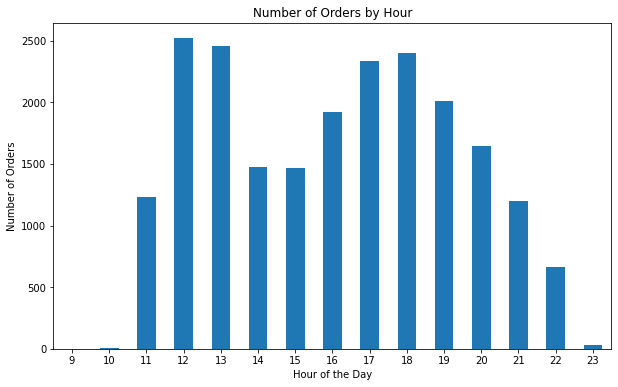

In [41]:
# visualize the number of orders by hour of the day using a bar plot.
# this will provide insights into the distribution of orders throughout the day.

orders_by_hour.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.xticks(rotation=0)
plt.show()

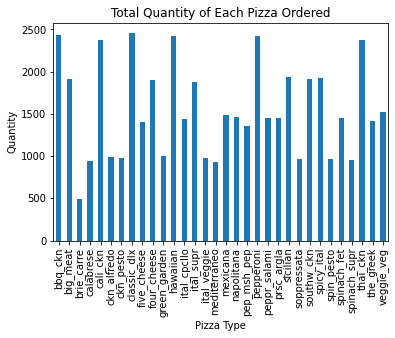

In [42]:
# visualize the total quantity of each pizza ordered using a bar plot. 
# this will help to understand the popularity and demand for different pizza types.

pizza_quantity.plot(kind='bar')
plt.xlabel('Pizza Type')
plt.ylabel('Quantity')
plt.title('Total Quantity of Each Pizza Ordered')
plt.show()

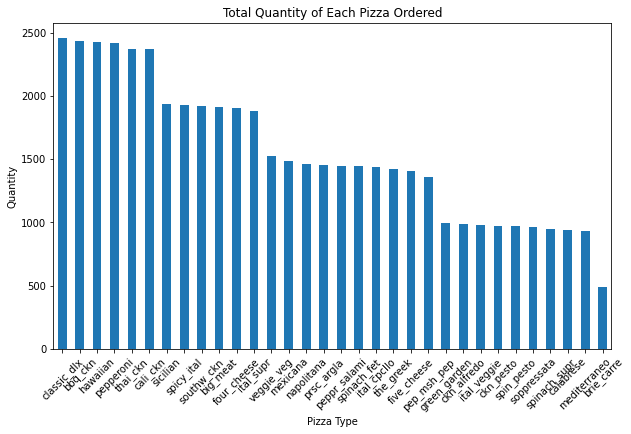

In [43]:
# visualize the total quantity of each pizza ordered using a bar plot with rotated x-axis labels. 
# this helps to show the quantity distribution when the pizza types have longer names.

pizza_quantity = merged_data_pizzaId.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False)
pizza_quantity.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Pizza Type')
plt.ylabel('Quantity')
plt.title('Total Quantity of Each Pizza Ordered')
plt.xticks(rotation=45)
plt.show()

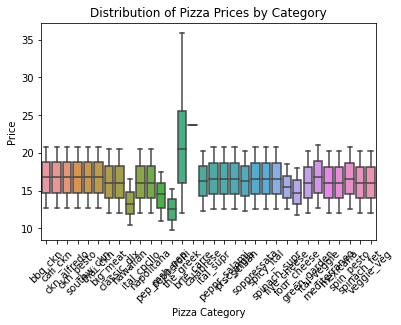

In [44]:
# creates a box plot that displays the distribution of pizza prices by category. 
# this helps identify the price range and distribution within each pizza category

sns.boxplot(x='pizza_type_id', y='price', data=pizzas)
plt.xlabel('Pizza Category')
plt.ylabel('Price')
plt.title('Distribution of Pizza Prices by Category')
plt.xticks(rotation=45)
plt.show()

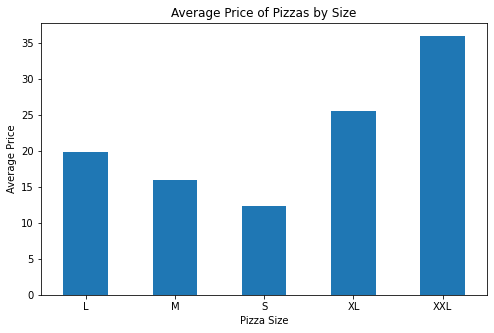

In [45]:
average_price_by_size.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Pizza Size')
plt.ylabel('Average Price')
plt.title('Average Price of Pizzas by Size')
plt.xticks(rotation=0)
plt.show()

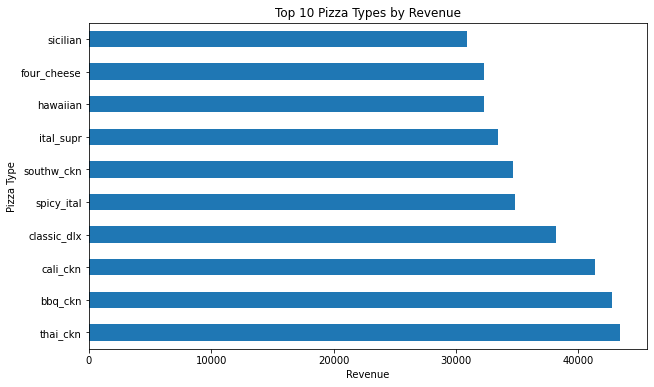

In [46]:
top_pizza_types = revenue_by_pizza_type.head(10)
top_pizza_types.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Revenue')
plt.ylabel('Pizza Type')
plt.title('Top 10 Pizza Types by Revenue')
plt.show()

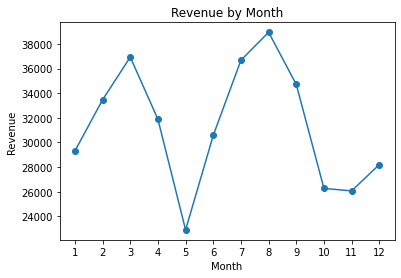

In [47]:
revenue_by_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.xticks(range(1, 13))
plt.show()

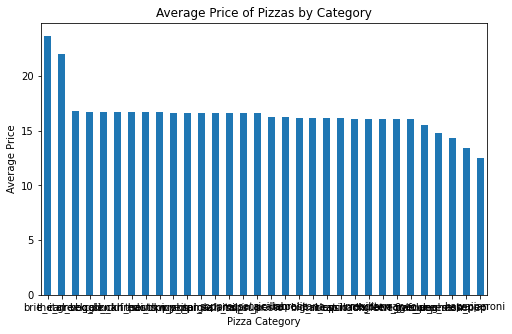

In [48]:
average_price_by_category.plot(kind='bar', figsize=(8, 5))
plt.xlabel('Pizza Category')
plt.ylabel('Average Price')
plt.title('Average Price of Pizzas by Category')
plt.xticks(rotation=0)
plt.show()

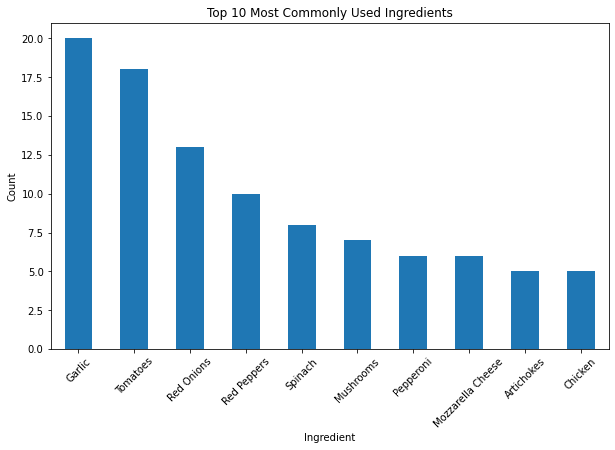

In [49]:
ingredient_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.title('Top 10 Most Commonly Used Ingredients')
plt.xticks(rotation=45)
plt.show()

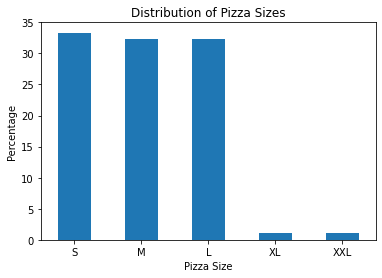

In [50]:
pizza_size_distribution.plot(kind='bar')
plt.xlabel('Pizza Size')
plt.ylabel('Percentage')
plt.title('Distribution of Pizza Sizes')
plt.xticks(rotation=0)
plt.show()

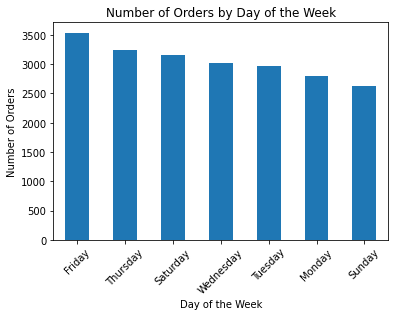

In [51]:
orders_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of the Week')
plt.xticks(rotation=45)
plt.show()